In [1]:
import pyamg
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
n = 10
x = np.linspace(0,1,n+2)[1:-1]
A = pyamg.gallery.poisson((n,), format='csr')

In [3]:
ml = pyamg.smoothed_aggregation_solver(A, max_coarse=1, improve_candidates=None, keep=True)

In [4]:
ml

multilevel_solver
Number of Levels:     4
Operator Complexity:  1.536
Grid Complexity:      1.700
Coarse Solver:        'pinv2'
  level   unknowns     nonzeros
    0           10           28 [65.12%]
    1            4           10 [23.26%]
    2            2            4 [ 9.30%]
    3            1            1 [ 2.33%]

array([[ 0.70710678,  0.        ,  0.        ,  0.        ],
       [ 0.70710678,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.57735027,  0.        ,  0.        ],
       [ 0.        ,  0.57735027,  0.        ,  0.        ],
       [ 0.        ,  0.57735027,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.57735027,  0.        ],
       [ 0.        ,  0.        ,  0.57735027,  0.        ],
       [ 0.        ,  0.        ,  0.57735027,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.70710678],
       [ 0.        ,  0.        ,  0.        ,  0.70710678]])

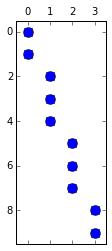

In [5]:
T = ml.levels[0].T.toarray()
plt.spy(T, marker='o')
T

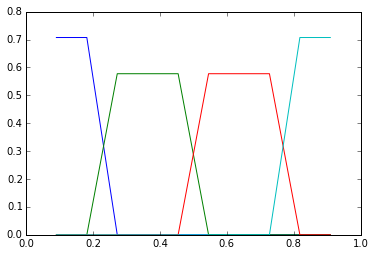

In [6]:
T = ml.levels[0].T.toarray()
for i in range(T.shape[1]):
    plt.plot(x, T[:, i])

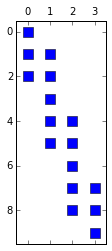

In [7]:
P = ml.levels[0].P.toarray()
plt.spy(P, marker='s')

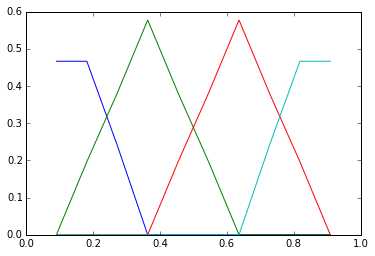

In [8]:
P = ml.levels[0].P.toarray()
for i in range(P.shape[1]):
    plt.plot(x, P[:, i])

In [9]:
B = np.ones((n, 2))
B[:,1] = x
print(B)

[[ 1.          0.09090909]
 [ 1.          0.18181818]
 [ 1.          0.27272727]
 [ 1.          0.36363636]
 [ 1.          0.45454545]
 [ 1.          0.54545455]
 [ 1.          0.63636364]
 [ 1.          0.72727273]
 [ 1.          0.81818182]
 [ 1.          0.90909091]]


In [10]:
ml = pyamg.smoothed_aggregation_solver(A, B=B, max_coarse=1, improve_candidates=None, keep=True)

In [11]:
ml

multilevel_solver
Number of Levels:     4
Operator Complexity:  3.143
Grid Complexity:      2.400
Coarse Solver:        'pinv2'
  level   unknowns     nonzeros
    0           10           28 [31.82%]
    1            8           40 [45.45%]
    2            4           16 [18.18%]
    3            2            4 [ 4.55%]

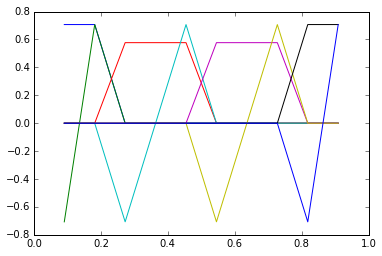

In [12]:
T = ml.levels[0].T.toarray()
for i in range(T.shape[1]):
    plt.plot(x, T[:, i])

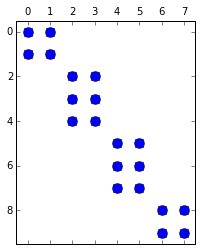

In [13]:
plt.spy(T, marker='o')

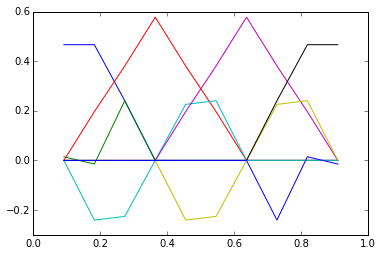

In [14]:
T = ml.levels[0].P.toarray()
for i in range(T.shape[1]):
    plt.plot(x, T[:, i])

In [15]:
A, B = pyamg.gallery.elasticity.linear_elasticity((4, 4))

In [16]:
A

<32x32 sparse matrix of type '<class 'numpy.float64'>'
	with 400 stored elements (blocksize = 2x2) in Block Sparse Row format>

In [17]:
B

array([[ 1. ,  0. ,  1.5],
       [ 0. ,  1. , -1.5],
       [ 1. ,  0. ,  1.5],
       [ 0. ,  1. , -0.5],
       [ 1. ,  0. ,  1.5],
       [ 0. ,  1. ,  0.5],
       [ 1. ,  0. ,  1.5],
       [ 0. ,  1. ,  1.5],
       [ 1. ,  0. ,  0.5],
       [ 0. ,  1. , -1.5],
       [ 1. ,  0. ,  0.5],
       [ 0. ,  1. , -0.5],
       [ 1. ,  0. ,  0.5],
       [ 0. ,  1. ,  0.5],
       [ 1. ,  0. ,  0.5],
       [ 0. ,  1. ,  1.5],
       [ 1. ,  0. , -0.5],
       [ 0. ,  1. , -1.5],
       [ 1. ,  0. , -0.5],
       [ 0. ,  1. , -0.5],
       [ 1. ,  0. , -0.5],
       [ 0. ,  1. ,  0.5],
       [ 1. ,  0. , -0.5],
       [ 0. ,  1. ,  1.5],
       [ 1. ,  0. , -1.5],
       [ 0. ,  1. , -1.5],
       [ 1. ,  0. , -1.5],
       [ 0. ,  1. , -0.5],
       [ 1. ,  0. , -1.5],
       [ 0. ,  1. ,  0.5],
       [ 1. ,  0. , -1.5],
       [ 0. ,  1. ,  1.5]])

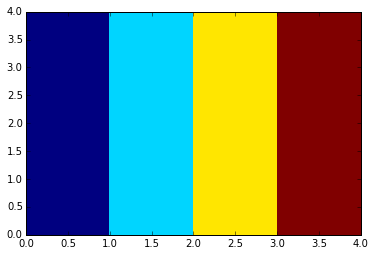

In [21]:
ux = B[0::2,2]
uy = B[1::2,2]
plt.pcolor(uy.reshape((4,4)))

In [22]:
A, B = pyamg.gallery.elasticity.linear_elasticity((100, 100), nu=0.4)

In [46]:
ml = pyamg.smoothed_aggregation_solver(A.tocsr(), max_coarse=10)
res=[]
b = np.zeros((A.shape[0],))
x0 = np.random.rand(A.shape[0])
u = ml.solve(b, x0=x0, residuals=res)
print(len(res))
print(ml)

101
multilevel_solver
Number of Levels:     5
Operator Complexity:  1.032
Grid Complexity:      1.066
Coarse Solver:        'pinv2'
  level   unknowns     nonzeros
    0        20000       355216 [96.92%]
    1         1156        10000 [ 2.73%]
    2          144         1156 [ 0.32%]
    3           16          108 [ 0.03%]
    4            3            9 [ 0.00%]



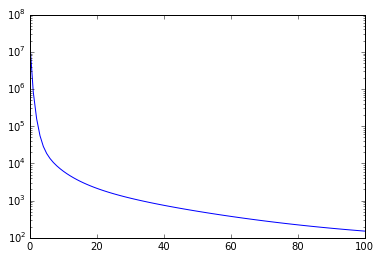

In [47]:
plt.semilogy(res)

In [42]:
uy = u[1::2]
ux = u[0::2]
print(len(u))
print(len(usub0))
print(len(usub1))

20000
10000
10000


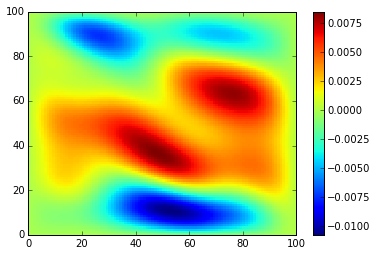

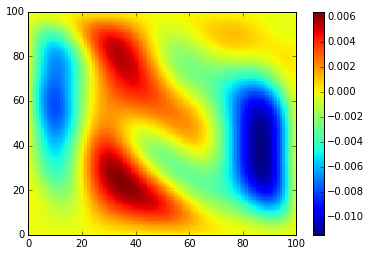

In [43]:
plt.figure()
plt.pcolor(ux.reshape((100,100)))
plt.colorbar()
plt.figure()
plt.pcolor(uy.reshape((100,100)))
plt.colorbar()

In [55]:
Bnew = np.zeros((A.shape[0],6))
Bnew[0::2, 0] = 1
Bnew[1::2, 0] = 1
Bnew[:,1] = u
Bnew[:,3:] = np.random.rand(A.shape[0], 3)
ml = pyamg.smoothed_aggregation_solver(A, B=Bnew, max_coarse=10, keep=True)
res=[]
b = np.zeros((A.shape[0],))
x0 = np.random.rand(A.shape[0])
#u = ml.solve(b, x0=x0, residuals=res)
#len(res)
ml

multilevel_solver
Number of Levels:     5
Operator Complexity:  2.142
Grid Complexity:      1.396
Coarse Solver:        'pinv2'
  level   unknowns     nonzeros
    0        20000       355216 [46.67%]
    1         6936       360000 [47.30%]
    2          864        41616 [ 5.47%]
    3           96         3888 [ 0.51%]
    4           18          324 [ 0.04%]

(20, 50)


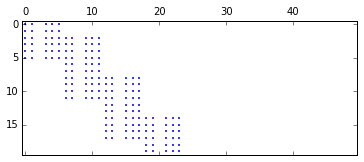

In [65]:
%matplotlib inline
T = ml.levels[0].P.toarray()[:20,:50]
print(T.shape)
plt.spy(T, marker='.', ms=3)

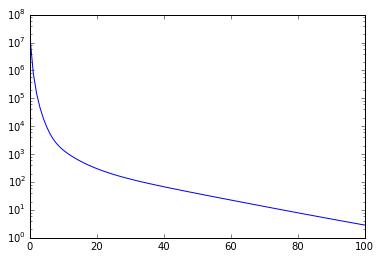

In [49]:
plt.semilogy(res)

In [50]:
ml

multilevel_solver
Number of Levels:     5
Operator Complexity:  1.286
Grid Complexity:      1.198
Coarse Solver:        'pinv2'
  level   unknowns     nonzeros
    0        20000       355216 [77.78%]
    1         3468        90000 [19.71%]
    2          432        10404 [ 2.28%]
    3           48          972 [ 0.21%]
    4            9           81 [ 0.02%]

In [ ]:
usub0 = u[1::2]
usub1 = u[0::2]
print(len(u))
print(len(usub0))
print(len(usub1))
plt.pcolor(usub1.reshape((100,100)))
plt.colorbar()

In [ ]:
u = B[1::2,2]
plt.pcolor(u.reshape((100,100)))

In [51]:
A

<20000x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 355216 stored elements (blocksize = 2x2) in Block Sparse Row format>